# View TensorFlow Image Distortions

It is standard practice to "augment" training data with distorted images: strerching, cropping, flipping, saturation and hue. TensorFlow has several built-in image distortions. This is a short notebook to view images with these distortions. This is useful for selecting reasonable ranges for random distortions.


Python Notebook by Patrick Coady: [Learning Artificial Intelligence](https://pat-coady.github.io/)

In [1]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
def distort(filename):
    """Apply image distortions"""
    with tf.Graph().as_default():
        file = tf.read_file(filename)
        img = tf.image.decode_jpeg(file, 3)
        img = tf.image.adjust_saturation(img, 0.5)
#         img = tf.image.adjust_hue(img, -0.05)
        with tf.Session() as sess:
            dist_img = sess.run(img)
    
    return dist_img

In [6]:
filenames = glob.glob('../tiny-imagenet-200/test/images/*.JPEG')
pick_8 = random.sample(filenames, 8)

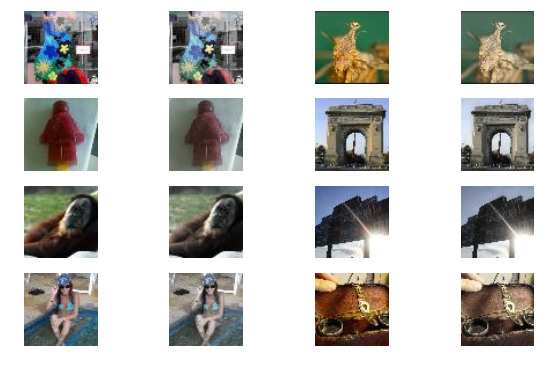

In [7]:
count = 0
for filename in pick_8:
    count += 1
    plt.subplot(4, 4, count)
    img = scipy.ndimage.imread(filename)
    plt.imshow(img)
    plt.axis('off')
    img_distort = distort(filename)
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(img_distort)
    plt.axis('off')

plt.show()    